In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt# 设置区
# 初始条件设定
N = 3.3e8 #总人口
S0 = N - 1 #假设每个人一开始都是易感的，除了 1 人被感染
I0 = 1 
D0 = 0
R0 = 0

# 形成时间点网络，0-3000天均分100份
t = np.linspace(0, 3000, 100) 

# 参数设定 (可以参考文献或者自己训练)
alpha = 0.0152
beta = 0.0039
gamma = 0.0001

In [2]:
# SIR 模型微分方程，输入时间网络，参数和变量向量化，输出每个变量对时间t的微分
def deriv(y, t, alpha, betta, gamma):
    S, I, D, R = y
    dSdt = - (alpha / N) * S * I
    dIdt = (alpha / N) * S * I - beta * I - gamma * I 
    dDdt = gamma * I
    dRdt = beta * I

    return dSdt, dIdt, dDdt, dRdt

In [3]:
%%time
# 初始条件向量化
y0 = S0, I0, D0, R0
# 在时间网格 t 上积分 SIR 方程
# odeint(方程函数，初始向量，求解范围，参数)，返回值是微分方程数值解的矩阵
ret = odeint(deriv, y0, t, args=(alpha, beta, gamma))
#转置矩阵赋值给四个向量
S, I, D, R = ret.T

CPU times: user 2.19 ms, sys: 29 µs, total: 2.22 ms
Wall time: 2.2 ms


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  from ipykernel import kernelapp as app


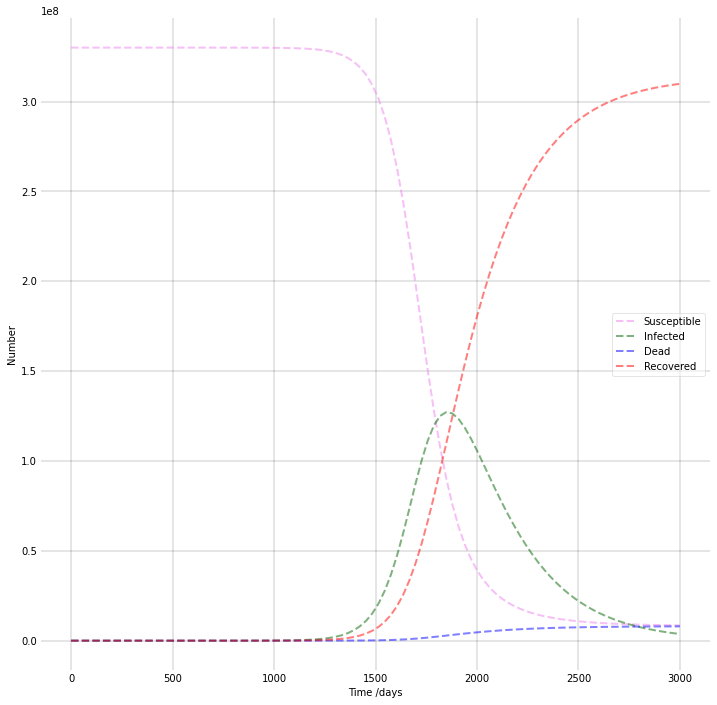

In [4]:
# 绘制时间序列图
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.set_facecolor('xkcd:white')

ax.plot(t, S, 'violet', alpha=0.5, lw=2, label='Susceptible', linestyle='dashed')
ax.plot(t, I, 'darkgreen', alpha=0.5, lw=2, label='Infected', linestyle='dashed')
ax.plot(t, D, 'blue', alpha=0.5, lw=2, label='Dead', linestyle='dashed')
ax.plot(t, R, 'red', alpha=0.5, lw=2, label='Recovered', linestyle='dashed')

ax.set_xlabel('Time /days')
ax.set_ylabel('Number')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='black', lw=0.2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()